# Cuaterniones y Rotaciones 3D
## Primera entrega AB Unit 34

Alumno: Javier Ruiz

Fecha: 26/02/25

## Introducción

Los números complejos y sus extensiones, como los cuaterniones, son herramientas matemáticas fundamentales en campos como la física, ingenería y computación grafica 

Los números complejos, expresados en su forma polar $z = r(\cos \theta + i\cdot\sin \theta)$ o en su forma exponencial $z = r\cdot e^{i\theta}$, permiten operaciones como la multiplicación y la potenciació  de forma elegante, interpretando estas operaciones como transformaciones geométricas en el plano.

Los cuaterniones, descubiertos por Hamilton en 1843, extienden esta idea al espacio tridimensional, proporcionando una representación matemática eficiente para rotaciones 3D. Un cuaternión se expresa de la siguiente forma:

$$q = w + xi + yj + zk$$

Donde $w$ es la parte escalar y $(x,y,z)$ la parte vectorial. Los cuaterniones unitarios (de norma 1) representan el espacio 3D y ofrecen ventajas significativas sobre otros métodos como las matrices de rotación o ángulos de Euler.
 
En este trabajo, exploraremos cómo los cuaterniones permiten realizar rotaciones e interpolaciones en el espacio tridimensional, analizando en particular la importancia de la interpolación esférica (SLERP) para obtener animaciones suaves y naturales en aplicaciones de gráficos por computadora.

# 1. Fundamentos Teóricos 

## ¿Qué es un cuaternión?

Un cuaternión es una extensión de los números complejos y se expresa como: 

    q = w + xi + yj + zk

donde w es la parte real y (x, y, z) constituyen la parte imaginaria. Los cuaterniones tienen propiedades algebraicas muy útiles para representar rotaciones en 3D. En particular:

- Multiplicación no conmutativa: El producto de cuaterniones no es conmutativo, lo que refleja la naturaleza de las rotaciones en el espacio.

- Conjugado e Inverso: Para un cuaternión q, el conjugado es q* = w − xi − yj − zk. Si q es unitario (|q| = 1), entonces q⁻¹ = q*. Esto es fundamental, ya que para rotar un vector v en 3D se usa la fórmula:
         
     v' = q · (0, v) · q⁻¹

     donde (0, v) es el cuaternión puro que representa al vector.
    
 **Representación de una Rotación:**
    Para rotar un vector v alrededor de un eje unitario u = (u_x, u_y, u_z) por un ángulo θ, el cuaternión de rotación se define como:

     q = [cos(θ/2), sin(θ/2)·u_x, sin(θ/2)·u_y, sin(θ/2)·u_z]

La ventaja de usar cuaterniones es que evitan problemas comunes de otros métodos, como el gimbal lock, y permiten una interpolación suave (SLERP) entre rotaciones.

"""
## Forma Polar de Números Complejos y su Relación con Cuaterniones

Los números complejos pueden representarse en forma polar como:

$$z = r(\cos \theta + i\cdot\sin \theta) = r\cdot e^{i\theta}$$

donde $r$ es el módulo y $\theta$ es el argumento. Esta representación facilita operaciones como:

- Multiplicación: $z_1\cdot z_2 = r_1 r_2\cdot e^{i(\theta_1+\theta_2)}$
- División: $z_1/z_2 = (r_1/r_2)\cdot e^{i(\theta_1-\theta_2)}$
- Potenciación: $z^n = r^n\cdot e^{in\theta}$

Geométricamente, multiplicar por un número complejo de módulo 1 equivale a una rotación en el plano complejo.

Los cuaterniones extienden este concepto al espacio 3D. Un cuaternión unitario puede expresarse en forma exponencial como:

$$q = \cos(\theta/2) + \vec{u}\sin(\theta/2)$$

donde $\vec{u}$ es un vector unitario que representa el eje de rotación y $\theta$ es el ángulo de rotación. Esta forma es análoga a la forma exponencial de los números complejos $e^{i\theta}$, y permite interpretar los cuaterniones como rotaciones en el espacio tridimensional.

## Interpolación de Cuaterniones y SLERP

Para animaciones suaves en gráficos 3D, necesitamos interpolar entre rotaciones. Existen dos enfoques principales:

1. **Interpolación Lineal (LERP)**: Consiste en interpolar linealmente entre dos cuaterniones y normalizar el resultado:
   
   $$q(t) = \frac{(1-t)q_1 + tq_2}{|(1-t)q_1 + tq_2|}$$
   
   Esta aproximación es computacionalmente eficiente pero produce rotaciones con velocidad no uniforme.

2. **Interpolación Esférica Lineal (SLERP)**: Produce rotaciones con velocidad angular constante:
   
   $$q(t) = q_1(q_1^{-1}q_2)^t$$
   
   Que puede calcularse como:
   
   $$q(t) = \frac{\sin((1-t)\theta)}{\sin(\theta)}q_1 + \frac{\sin(t\theta)}{\sin(\theta)}q_2$$
   
   Donde $\theta$ es el ángulo entre $q_1$ y $q_2$.

SLERP es crucial en animaciones 3D porque:

- Mantiene velocidad angular constante durante la rotación
- Sigue el camino más corto en la hipersuperficie unitaria (una geodésica)
- Produce movimientos que parecen naturales al ojo humano

Sin SLERP, las animaciones podrían parecer "acelerar" o "desacelerar" durante las transiciones, lo que rompe la ilusión de movimiento natural en aplicaciones como videojuegos, simuladores y animaciones 3D.
"""



## Ángulos de Euler para la Descripción de Rotaciones en 3D

Los ángulos de Euler describen la orientación de un objeto en el espacio tridimensional mediante tres rotaciones sucesivas. Utilizando la convención intrínseca **ZYX**, se realizan las siguientes rotaciones:

1. Rotación en torno al eje Z (Yaw)

    Se gira el objeto en el plano XY según el ángulo $\psi$. La matriz de rotación es:

    $$
    R_z(\psi) =
    \begin{pmatrix}
    \cos\psi & -\sin\psi & 0 \\
    \sin\psi & \cos\psi  & 0 \\
    0        & 0         & 1
    \end{pmatrix}
    $$

2. Rotación en torno al eje Y (Pitch)

    Luego se rota el objeto respecto al eje Y mediante el ángulo $\theta$, inclinando el objeto hacia arriba o hacia abajo. La matriz de rotación es:
    
    $$
    R_y(\theta) =
    \begin{pmatrix}
    \cos\theta & 0 & \sin\theta \\
    0          & 1 & 0 \\
    -\sin\theta& 0 & \cos\theta
    \end{pmatrix}
    $$

3. Rotación en torno al eje X (Roll)

    Finalmente, se rota el objeto en torno al eje X mediante el ángulo $\phi$, lo que produce una inclinación lateral. La matriz de rotación es:

    $$
    R_x(\phi) =
    \begin{pmatrix}
    1 & 0         & 0 \\
    0 & \cos\phi & -\sin\phi \\
    0 & \sin\phi & \cos\phi
    \end{pmatrix}
    $$

Matriz de Rotación Total

La orientación final se obtiene al multiplicar las matrices en el siguiente orden:

$$
R = R_z(\psi) \cdot R_y(\theta) \cdot R_x(\phi)
$$




## 2. Ejemplo en Python

**Uso de Cuaterniones para Rotaciones 3D:**

Aspectos técnicos incluidos:
- Definición y propiedades de los cuaterniones.
- Cómo construir un cuaternión de rotación a partir de un ángulo y un eje.
- Aplicación de la fórmula de rotación: v' = q · (0, v) · q⁻¹.
- Comparación de cuaterniones vs. métodos basados en ángulos de Euler y matrices de rotación.

2.1. Operaciones básicas con cuaterniones

- Multiplicacion de  dos cuaterniones q1 y q2.
        
    Cada cuaternión se representa como un vector numpy [w, x, y, z].
    La multiplicación se define de forma no conmutativa.
        
    Args:
        
        q1 (np.ndarray): Primer cuaternión.  
        q2 (np.ndarray): Segundo cuaternión.
        
    Returns:
        
        np.ndarray: El producto q1*q2.

- Calcula el conjugado de un cuaternión.
    
    Para q = [w, x, y, z], el conjugado es [w, -x, -y, -z].
    
    Args:
        
        q (np.ndarray): Cuaternión.
    
    Returns:
        
        np.ndarray: Conjugado de q.

- Normaliza un cuaternión para que tenga norma 1.
    
    Args:
        
        q (np.ndarray): Cuaternión.
    
    Returns:
        
        np.ndarray: Cuaternión normalizado


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Multiplicación de cuaterniones
def quaternion_multiply(q1, q2):
   
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    # Fórmula de multiplicación de cuaterniones:
    w = w1*w2 - x1*x2 - y1*y2 - z1*z2
    x = w1*x2 + x1*w2 + y1*z2 - z1*y2
    y = w1*y2 - x1*z2 + y1*w2 + z1*x2
    z = w1*z2 + x1*y2 - y1*x2 + z1*w2
    return np.array([w, x, y, z])

# Conjugado de un cuaternión
def quaternion_conjugate(q):

    w, x, y, z = q
    return np.array([w, -x, -y, -z])

# Normalización de un cuaternión
def quaternion_normalization(q):

    return q / np.linalg.norm(q) 

q1 = np.array([1, 2, 3, 4], dtype=float)
q2 = np.array([5, 6, 7, 8], dtype=float)
prod = quaternion_multiply(q1, q2)
print("Ejemplo multiplicación:\nq1 =", q1, "\nq2 =", q2, "\nq1 * q2 =", prod)
print("Celda 1 ejecutada: Importaciones y funciones de cuaternmiones definidas") 

Ejemplo multiplicación:
q1 = [1. 2. 3. 4.] 
q2 = [5. 6. 7. 8.] 
q1 * q2 = [-60.  12.  30.  24.]
Celda 1 ejecutada: Importaciones y funciones de cuaternmiones definidas


2.2 Rotación de vectores y generación de vertices

- Rota un vector 3D v usando el cuaternión de rotación q.
    
    Args:
        
        v (np.ndarray): Vector 3D, de forma (3,).
    
        q (np.ndarray): Cuaternión de rotación unitario, de forma (4,).
    
    Returns:
       
        np.ndarray: Vector rotado.


- Genera los 8 vértices de un cubo centrado en el origen.
    
    Args:
        
        side_length (float): Longitud de la arista del cubo.
    
    Returns:
        
        np.ndarray: Arreglo de forma (8, 3) con las coordenadas de los vértices.

- Aplica una rotación definida por el cuaternión q a cada punto 3D.
    
    Args:
        
        points (np.ndarray): Conjunto de puntos de forma (N, 3).
    
        q (np.ndarray): Cuaternión de rotación unitario.
    
    Returns:
        
        np.ndarray: Puntos rotados.


In [3]:
def rotate_vector(v, q):
 
    # Convertir el vector a un cuaternión puro: 0 + v_x i + v_y j + v_z k
    q_v = np.concatenate(([0], v))
    # Para un cuaternión unitario, el inverso es su conjugado
    q_conj = quaternion_conjugate(q)
    # Aplicar la fórmula de rotación: v' = q * q_v * q_conj
    qv_rot = quaternion_multiply(quaternion_multiply(q, q_v), q_conj)
    # Los componentes imaginarios son el vector rotado
    return qv_rot[1:]

def generate_cube_vertices(side_length=2):
   
    a = side_length / 2.0
    vertices = np.array([
        [-a, -a, -a],
        [-a, -a,  a],
        [-a,  a, -a],
        [-a,  a,  a],
        [ a, -a, -a],
        [ a, -a,  a],
        [ a,  a, -a],
        [ a,  a,  a]
    ])
    return vertices

def rotate_points(points, q):
   
    rotados = [rotate_vector(p, q) for p in points]
    return np.array(rotados)

# Ejemplo: rotar un vector
v_example = np.array([1, 0, 0])
# Usamos un cuaternión que representa una rotación de 90° alrededor de z (por simplicidad)
theta_example = np.pi / 2
q_example = np.array([np.cos(theta_example/2), 0, 0, np.sin(theta_example/2)])
q_example = quaternion_normalization(q_example)
v_rot = rotate_vector(v_example, q_example)
print("Vector original:", v_example)
print("Vector rotado (90° sobre z):", v_rot)

# Generar vértices del cubo
cube_vertices = generate_cube_vertices(side_length=2.0)
print("Vértices del cubo:\n", cube_vertices)
print("Celda 2 ejecutada: Funciones de rotación y generación de vértices definidas.\n")

Vector original: [1 0 0]
Vector rotado (90° sobre z): [0. 1. 0.]
Vértices del cubo:
 [[-1. -1. -1.]
 [-1. -1.  1.]
 [-1.  1. -1.]
 [-1.  1.  1.]
 [ 1. -1. -1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]
Celda 2 ejecutada: Funciones de rotación y generación de vértices definidas.



2.3 Graficar el cubo 3D

- Dibuja un cubo en un Axes3D dado sus vértices.
    
    ax: objeto Axes3D
    
    vertices: arreglo (8,3) con las coordenadas de los vértices
    
    color: color para aristas y vértices
    
    label: etiqueta para la leyenda


In [4]:
def plot_cube(ax, vertices, color='b', label='Cubo'):
   
    # Definir aristas
    edges = [
        (0,1), (0,2), (0,4),
        (1,3), (1,5),
        (2,3), (2,6),
        (3,7),
        (4,5), (4,6),
        (5,7),
        (6,7)
    ]
    # Graficar aristas
    for i, j in edges:
        ax.plot([vertices[i,0], vertices[j,0]],
                [vertices[i,1], vertices[j,1]],
                [vertices[i,2], vertices[j,2]],
                color=color, linewidth=2)
    # Graficar vértices
    ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2],
               color=color, s=50, label=label)

print("Celda 3 ejecutada: función para crear el cubo definida.\n")


Celda 3 ejecutada: función para crear el cubo definida.



2.4 Ejemplo de uso

Ejecutando visualización 3D
Cuaternión de rotación (unitario): [0.92387953 0.27059805 0.27059805 0.        ]
Vértices del cubo original:
 [[-1. -1. -1.]
 [-1. -1.  1.]
 [-1.  1. -1.]
 [-1.  1.  1.]
 [ 1. -1. -1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]
Vértices del cubo rotado:
 [[-1.5        -0.5        -0.70710678]
 [-0.5        -1.5         0.70710678]
 [-1.20710678  1.20710678  0.29289322]
 [-0.20710678  0.20710678  1.70710678]
 [ 0.20710678 -0.20710678 -1.70710678]
 [ 1.20710678 -1.20710678 -0.29289322]
 [ 0.5         1.5        -0.70710678]
 [ 1.5         0.5         0.70710678]]


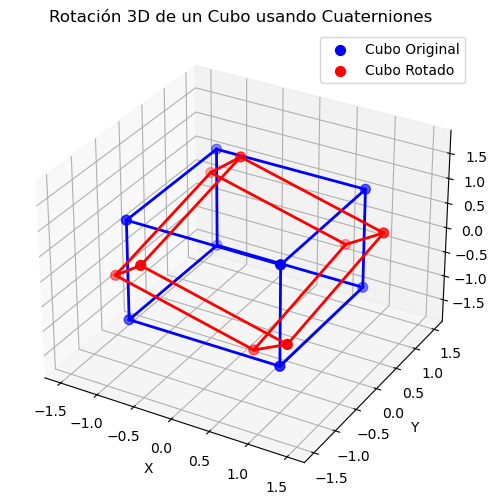

In [5]:

def main():
    # 1. Definir un cuaternión de rotación
    # Queremos rotar 45° (pi/4) alrededor del eje (1,1,0)
    theta = np.pi / 4
    axis = np.array([1, 1, 0], dtype=float)
    axis /= np.linalg.norm(axis)  # normalizar
    # Cuaternión de rotación: [cos(theta/2), sin(theta/2)*u_x, sin(theta/2)*u_y, sin(theta/2)*u_z]
    q = np.array([np.cos(theta/2),
                  axis[0]*np.sin(theta/2),
                  axis[1]*np.sin(theta/2),
                  axis[2]*np.sin(theta/2)], dtype=float)
    q = quaternion_normalization(q)
    
    print("Cuaternión de rotación (unitario):", q)
    
    # 2. Generar el cubo
    cube = generate_cube_vertices(side_length=2.0)
    print("Vértices del cubo original:\n", cube)

    # 3. Rotar el cubo
    cube_rot = rotate_points(cube, q)
    print("Vértices del cubo rotado:\n", cube_rot)
    
    # 4. Visualizar en 3D
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    plot_cube(ax, cube, color='b', label='Cubo Original')
    plot_cube(ax, cube_rot, color='r', label='Cubo Rotado')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Rotación 3D de un Cubo usando Cuaterniones')
    ax.legend()
    plt.show()

print("Ejecutando visualización 3D")
main()


In [6]:
def slerp(q1, q2, t):
    
    dot = np.sum(q1 * q2)

    if abs(dot) > 0.9995:
        # Si los cuaterniones son casi iguales, interpolación lineal
        result = q1 + t * (q2 - q1)
        return quaternion_normalization(result)
    
    # Aseguramos usar el camino más corto
    if dot < 0:
        q2 = -q2
        dot = -dot
    
    # Calcular el ángulo entre los cuaterniones
    theta_0 = np.arccos(dot)
    sin_theta_0 = np.sin(theta_0)

    # Calculamos la interpolación esférica
    theta = theta_0 * t
    sin_theta = np.sin(theta)

    s0 = np.cos(theta) - dot * sin_theta / sin_theta_0
    s1 = sin_theta / sin_theta_0

    return quaternion_normalization(s0 * q1 + s1 * q2)

# Interpolación de cuaterniones usando SLERP
def interpolate_quaternions_slerp(q_start, q_end, num_steps):
    
    quats = []
    for t in np.linspace(0, 1, num_steps):
        q_interp = slerp(q_start, q_end, t)
        quats.append(q_interp)
    return quats

In [7]:
# Visualización comparativa de la interpolación SLERP VS LERP
def compare_interpolation(q_start, q_end, num_steps=10, vector=np.array([1, 1, 1]), dtype=float):
    
    # Interpolación lineal
    quats_lerp = interpolate_quaternions(q_start, q_end, num_steps)
    trayectory_lerp = [rotate_vector(vector, q) for q in quats_lerp]

    # Interpolación esférica
    quats_slerp = interpolate_quaternions_slerp(q_start, q_end, num_steps)
    trayectory_slerp = [rotate_vector(vector, q) for q in quats_slerp]

    return np.array(trayectory_lerp), np.array(trayectory_slerp)

def plot_comparsion(trayectory_lerp, trayectory_slerp, view='xy', title=None):

    if view == '3d':
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(trajectory_lerp[:,0], trajectory_lerp[:,1], trajectory_lerp[:,2], 'o-', color='blue', label='LERP')
        ax.plot(trajectory_slerp[:,0], trajectory_slerp[:,1], trajectory_slerp[:,2], 'o-', color='red', label='SLERP')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    else:
        fig = plt.figure(figsize=(10, 6))
        if view == 'xy':
            plt.plot(trayectory_lerp[:,0], trayectory_lerp[:,1], 'o-', color='blue', label='LERP')
            plt.plot(trayectory_slerp[:,0], trayectory_slerp[:,1], 'o-', color='red', label='SLERP')
            plt.xlabel('X')
            plt.ylabel('Y')
        elif view == 'xz':
            plt.plot(trayectory_lerp[:,0], trayectory_lerp[:,2], 'o-', color='blue', label='LERP')
            plt.plot(trayectory_slerp[:,0], trayectory_slerp[:,2], 'o-', color='red', label='SLERP')
            plt.xlabel('X')
            plt.ylabel('Z')
        elif view == 'yz':
            plt.plot(trayectory_lerp[:,1], trayectory_lerp[:,2], 'o-', color='blue', label='LERP')
            plt.plot(trayectory_slerp[:,1], trayectory_slerp[:,2], 'o-', color='red', label='SLERP')
            plt.xlabel('Y')
            plt.ylabel('Z')

    if title:
        plt.title(title)
    else:
        plt.title(f'Comparación de Interpolación LERP vs SLERP(vista {view.upper()})')
    plt.grind(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

In [8]:
def main_comparison():
    """
    Función principal para comparar LERP y SLERP.
    """
    # Definimos el cuaternión identidad (sin rotación)
    q_identity = np.array([1, 0, 0, 0], dtype=float)
    
    # Definimos una rotación de 90° alrededor del eje Z
    theta = np.pi / 2  # 90 grados
    axis = np.array([0, 0, 1], dtype=float)  # eje Z
    q_z90 = np.array([np.cos(theta/2),
                     axis[0]*np.sin(theta/2),
                     axis[1]*np.sin(theta/2),
                     axis[2]*np.sin(theta/2)], dtype=float)
    q_z90 = quaternion_normalization(q_z90)
    
    # Vamos a interpolar entre la identidad y una rotación de 90° en Z
    num_steps = 20
    
    # Vector que vamos a seguir durante la rotación
    vector = np.array([1, 0, 0], dtype=float)  # Vector en el eje X
    
    # Calcular trayectorias
    traj_lerp, traj_slerp = compare_interpolations(q_identity, q_z90, num_steps, vector)
    
    # Graficar comparaciones en diferentes vistas
    plot_comparison(traj_lerp, traj_slerp, 'xy', 'Trayectoria del vector [1,0,0] durante la rotación (Vista XY)')
    plot_comparison(traj_lerp, traj_slerp, '3d', 'Trayectoria del vector [1,0,0] durante la rotación (Vista 3D)')
    
    # También podemos comparar con una rotación más compleja
    # Rotación de 120° alrededor del eje [1,1,1]
    theta = 2*np.pi / 3  # 120 grados
    axis = np.array([1, 1, 1], dtype=float)
    axis = axis / np.linalg.norm(axis)  # normalizar
    q_complex = np.array([np.cos(theta/2),
                         axis[0]*np.sin(theta/2),
                         axis[1]*np.sin(theta/2),
                         axis[2]*np.sin(theta/2)], dtype=float)
    q_complex = quaternion_normalization(q_complex)
    
    # Calcular trayectorias para la rotación compleja
    traj_lerp2, traj_slerp2 = compare_interpolations(q_identity, q_complex, num_steps, vector)
    
    # Graficar comparaciones para la rotación compleja
    plot_comparison(traj_lerp2, traj_slerp2, 'xy', 'Rotación alrededor del eje [1,1,1] (Vista XY)')
    plot_comparison(traj_lerp2, traj_slerp2, 'xz', 'Rotación alrededor del eje [1,1,1] (Vista XZ)')
    plot_comparison(traj_lerp2, traj_slerp2, '3d', 'Rotación alrededor del eje [1,1,1] (Vista 3D)')
    
    # Mostrar también la velocidad angular
    plot_angular_velocity(q_identity, q_z90, num_steps)
    
    print("Comparación completada. Observe las diferencias entre las trayectorias LERP y SLERP.")

## Interpolación de cuaterniones: LERP vs SLERP

### ¿Por qué necesitamos SLERP?

La interpolación lineal (LERP) entre cuaterniones es computacionalmente eficiente pero tiene un problema fundamental: no preserva una velocidad angular constante durante la rotación. Esto se debe a que los cuaterniones unitarios forman una esfera en un espacio 4D, y la interpolación lineal corta a través de esta esfera en lugar de seguir su superficie.

Cuando aplicamos LERP a cuaterniones, ocurren dos problemas:

1. **No se mantiene la norma unitaria** - Los cuaterniones intermedios no son unitarios, lo que requiere normalización en cada paso.
2. **Velocidad angular no constante** - La rotación resultante acelera y decelera de forma no natural durante la transición.

### Interpolación esférica (SLERP)

SLERP (Spherical Linear Interpolation) resuelve estos problemas interpolando a lo largo del arco esférico que conecta los dos cuaterniones en la hiperesfera 4D. Matemáticamente, SLERP se define como:

SLERP(q1, q2, t) = q1(sin((1-t)θ)/sin(θ)) + q2(sin(tθ)/sin(θ))

Donde θ es el ángulo entre los cuaterniones q1 y q2, y t es el parámetro de interpolación (entre 0 y 1).

Las ventajas principales de SLERP son:

1. **Velocidad angular constante** - La rotación ocurre a un ritmo constante.
2. **Camino más corto** - Siempre sigue el arco más corto entre las dos orientaciones.
3. **Preserva la norma unitaria** - Los cuaterniones interpolados tienen norma unitaria.

### Visualizando la diferencia

Como se puede observar en las gráficas, la trayectoria generada por LERP es una línea recta (en el plano de proyección), mientras que SLERP genera un arco. En animación 3D y robótica, SLERP produce movimientos más naturales y predecibles.

La diferencia es especialmente notable cuando el ángulo entre las orientaciones iniciales y finales es grande. Para ángulos pequeños, LERP con normalización puede ser una aproximación aceptable y más eficiente computacionalmente.

In [9]:
def plot_angular_velocity(q_start, q_end, num_steps):
    """
    Grafica la velocidad angular en función del tiempo para LERP y SLERP.
    
    Args:
        q_start (np.ndarray): Cuaternión inicial
        q_end (np.ndarray): Cuaternión final
        num_steps (int): Número de pasos de interpolación
    """
    # Obtener las interpolaciones
    quats_lerp = interpolate_quaternions(q_start, q_end, num_steps)
    quats_slerp = interpolate_quaternions_slerp(q_start, q_end, num_steps)
    
    # Calcular ángulos entre cuaterniones consecutivos (proporcional a la velocidad angular)
    angles_lerp = []
    angles_slerp = []
    
    for i in range(1, len(quats_lerp)):
        # Para LERP
        dot_lerp = np.sum(quats_lerp[i-1] * quats_lerp[i])
        dot_lerp = np.clip(dot_lerp, -1.0, 1.0)  # Asegurar que está en el rango [-1, 1]
        angle_lerp = 2 * np.arccos(abs(dot_lerp))
        angles_lerp.append(angle_lerp)
        
        # Para SLERP
        dot_slerp = np.sum(quats_slerp[i-1] * quats_slerp[i])
        dot_slerp = np.clip(dot_slerp, -1.0, 1.0)
        angle_slerp = 2 * np.arccos(abs(dot_slerp))
        angles_slerp.append(angle_slerp)
    
    # Graficar velocidades angulares
    plt.figure(figsize=(10, 6))
    plt.plot(angles_lerp, 'o-', color='blue', label='LERP')
    plt.plot(angles_slerp, 'o-', color='red', label='SLERP')
    plt.title('Cambio angular entre pasos consecutivos')
    plt.xlabel('Paso')
    plt.ylabel('Ángulo (radianes)')
    plt.legend()
    plt.grid(True)
    plt.show()

La gráfica ilustra cómo cambia la posición de un vector 3D (en este caso, [1,1,1]
[1,1,1]) en el plano XY cuando se aplica una interpolación lineal (en lugar de una interpolación esférica) entre dos cuaterniones: el cuaternión identidad (sin rotación) y un cuaternión que representa una rotación concreta (45° alrededor de un eje dado).

En otras palabras, se va variando un parámetro 𝑡 de 0 a 1, y en cada paso se “mezcla” el cuaternión identidad con el cuaternión de rotación. Cada cuaternión intermedio se aplica al vector original, y en la gráfica se representan las coordenadas (𝑥,𝑦) del vector resultante.

- Lo relevante: se observa que el trazado es una línea recta en el plano XY, lo que no representa un giro “natural” (como un arco), sino una trayectoria lineal debido a la interpolación lineal en el espacio de cuaterniones (no se está usando SLERP, que sí genera trayectorias esféricas más fieles a la rotación real).

- En conclusión: la gráfica demuestra que, si interpolamos “ingenuamente” entre cuaterniones, la evolución del vector no describe un arco de rotación suave, sino un camino recto en las proyecciones XY (y, por extensión, en 3D), evidenciando la diferencia entre la interpolación lineal y la interpolación esférica (SLERP).